In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_dir = '/kaggle/input/hearth-disease-recognition/train.csv'
test_dir = '/kaggle/input/hearth-disease-recognition/test.csv'
sample_sub_dir = '/kaggle/input/hearth-disease-recognition/sample_submission.csv'

In [8]:
df = pd.read_csv(train_dir)

In [9]:
df.head(3)

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes


In [10]:
df.shape

(223084, 20)

In [58]:
df.dtypes

ID                                         object
History of HeartDisease or Attack          object
High Blood Pressure                        object
Told High Cholesterol                      object
Cholesterol Checked                        object
Body Mass Index                           float64
Smoked 100+ Cigarettes                     object
Diagnosed Stroke                           object
Diagnosed Diabetes                         object
Leisure Physical Activity                  object
Heavy Alcohol Consumption                  object
Health Care Coverage                       object
Doctor Visit Cost Barrier                  object
General Health                             object
Difficulty Walking                         object
Sex                                        object
Education Level                            object
Income Level                               object
Age                                         int64
Vegetable or Fruit Intake (1+ per Day)     object


In [60]:
for col in df.columns :
    print("-------------")
    print(f'{col} ,SIZE: {len(df[col])}')
    print(df[col].value_counts())

-------------
ID ,SIZE: 223084
ID
train_000001    1
train_148728    1
train_148717    1
train_148718    1
train_148719    1
               ..
train_074365    1
train_074366    1
train_074367    1
train_074368    1
train_223084    1
Name: count, Length: 223084, dtype: int64
-------------
History of HeartDisease or Attack ,SIZE: 223084
History of HeartDisease or Attack
No     203322
Yes     18068
Name: count, dtype: int64
-------------
High Blood Pressure ,SIZE: 223084
High Blood Pressure
No     136346
Yes     86738
Name: count, dtype: int64
-------------
Told High Cholesterol ,SIZE: 223084
Told High Cholesterol
No     110468
Yes     80430
Name: count, dtype: int64
-------------
Cholesterol Checked ,SIZE: 223084
Cholesterol Checked
Yes    183784
No      39300
Name: count, dtype: int64
-------------
Body Mass Index ,SIZE: 223084
Body Mass Index
24.92    208
26.48    207
25.64    206
26.63    206
24.93    202
        ... 
75.02      1
74.53      1
77.38      1
73.58      1
60.36      1
Nam

In [61]:
df.isnull().sum()

ID                                            0
History of HeartDisease or Attack          1694
High Blood Pressure                           0
Told High Cholesterol                     32186
Cholesterol Checked                           0
Body Mass Index                           11782
Smoked 100+ Cigarettes                        1
Diagnosed Stroke                              0
Diagnosed Diabetes                            3
Leisure Physical Activity                     0
Heavy Alcohol Consumption                     0
Health Care Coverage                          0
Doctor Visit Cost Barrier                     1
General Health                                1
Difficulty Walking                            3
Sex                                           0
Education Level                               0
Income Level                                  0
Age                                           0
Vegetable or Fruit Intake (1+ per Day)        0
dtype: int64

In [14]:
df[df['Told High Cholesterol'].isnull() == True]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
10,train_000011,No,No,NaN,No,50.64,No,No,No,No,No,No,Yes,Poor,Yes,Male,High school graduate,"($10,000 to less than $15,000",53,No
11,train_000012,No,Yes,NaN,No,13.64,Yes,No,No,Yes,No,Yes,Yes,Poor,No,Male,Some high school,"($10,000 to less than $15,000",65,Yes
12,train_000013,No,Yes,NaN,No,31.83,No,No,No,Yes,No,Yes,No,Fair,Yes,Female,High school graduate,"$20,000 to less than $25,000",70,Yes
19,train_000020,No,No,NaN,No,21.79,Yes,No,No,No,No,No,Yes,Fair,No,Female,Some high school,"($10,000 to less than $15,000",32,Yes
23,train_000024,No,Yes,NaN,No,35.31,No,No,No,Yes,No,Yes,No,Good,No,Male,Some college or technical school,"$35,000 to less than $50,000",48,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223056,train_223057,No,No,NaN,No,27.42,No,No,No,No,No,Yes,No,Fair,No,Female,Some college or technical school,"Less than $10,000",29,Yes
223062,train_223063,No,No,NaN,No,24.73,Yes,No,No,Yes,No,Yes,No,Excellent,No,Male,Some college or technical school,"$20,000 to less than $25,000",71,Yes
223074,train_223075,No,No,NaN,No,24.79,Yes,No,No,No,Yes,No,No,Good,No,Male,Elementary,"Less than $10,000",62,Yes
223075,train_223076,No,No,NaN,No,22.07,Yes,No,No,Yes,No,Yes,Yes,Fair,No,Female,College graduate,"($10,000 to less than $15,000",32,Yes


In [15]:
df.columns

Index(['ID', 'History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

# Impution

In [27]:
# Methods to Impute Told High Cholesterol
# 1. Drop
# 2. Mode
# 3. KNN Imputer
# 4. Unknown

# Method to Impute Body Mass Index
# 1. Drop
# 2. Mean
# 3. Iterative Imputer
# 4. Multiple Imputation

<ipython-input-27-93481a488119>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Told High Cholesterol'].fillna(df['Told High Cholesterol'].mode()[0], inplace=True)
<ipython-input-27-93481a488119>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


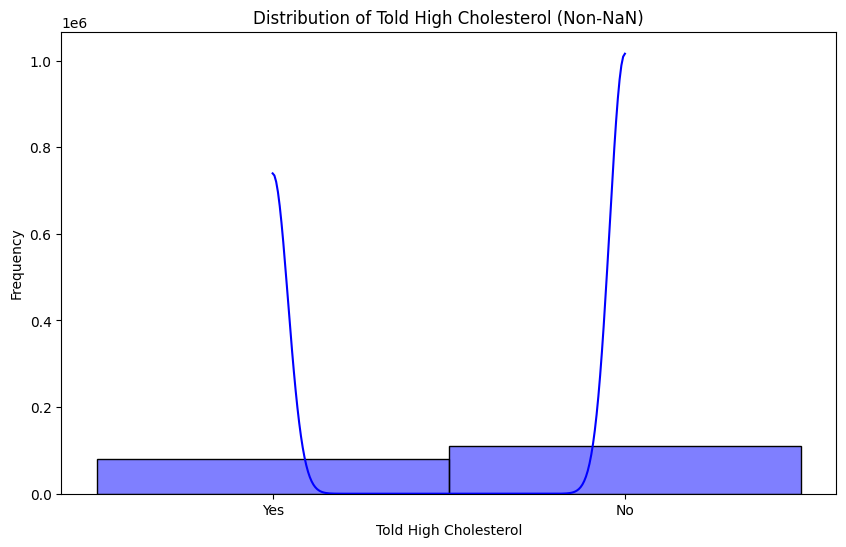

In [16]:
df_non_null = df[df['Told High Cholesterol'].notna()]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_non_null['Told High Cholesterol'], kde=True, color='blue')
plt.title('Distribution of Told High Cholesterol (Non-NaN)')
plt.xlabel('Told High Cholesterol')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


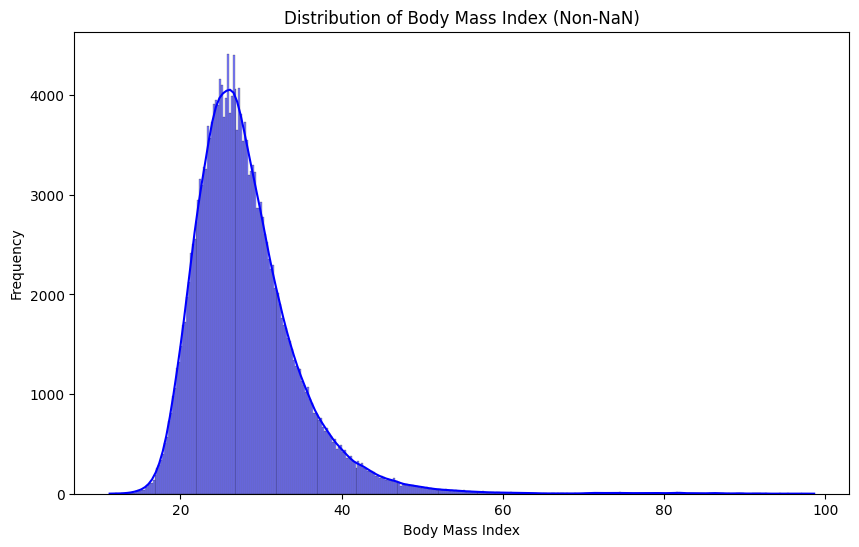

In [17]:
df_non_null = df[df['Body Mass Index'].notna()]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_non_null['Body Mass Index'], kde=True, color='blue')
plt.title('Distribution of Body Mass Index (Non-NaN)')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()

In [11]:
df["Told High Cholesterol"] = df["Told High Cholesterol"].fillna(df["Told High Cholesterol"].mode()[0])
df["Body Mass Index"] = df["Body Mass Index"].fillna(df["Body Mass Index"].median())

In [12]:
# Methods to impute [ Smoked 100+ Cigarettes , Diagnosed Diabetes ,Doctor Visit Cost Barrier , General Health ,Difficulty Walking ,History of HeartDisease or Attack ] 
# 1. drop (only)

col_droponly = ['Smoked 100+ Cigarettes', 'Diagnosed Diabetes', 'Doctor Visit Cost Barrier', 'General Health', 'Difficulty Walking' ,'History of HeartDisease or Attack']
df = df.dropna(subset=col_droponly)

In [13]:
# Methods to impute History of HeartDisease or Attack
df = df.dropna(subset=['History of HeartDisease or Attack'])

In [14]:
# columns to delete = ID
df = df.drop(columns=['ID'])

In [15]:
df.isnull().sum()

History of HeartDisease or Attack         0
High Blood Pressure                       0
Told High Cholesterol                     0
Cholesterol Checked                       0
Body Mass Index                           0
Smoked 100+ Cigarettes                    0
Diagnosed Stroke                          0
Diagnosed Diabetes                        0
Leisure Physical Activity                 0
Heavy Alcohol Consumption                 0
Health Care Coverage                      0
Doctor Visit Cost Barrier                 0
General Health                            0
Difficulty Walking                        0
Sex                                       0
Education Level                           0
Income Level                              0
Age                                       0
Vegetable or Fruit Intake (1+ per Day)    0
dtype: int64

# Encode Data

In [16]:
df.head(3)

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes


In [17]:
if 'Told High Cholesterol' in df.columns:
    print('เสว')

เสว


In [18]:
# Encode Binary (LabelEncoder)
from sklearn.preprocessing import LabelEncoder
binary_encode_col = ['History of HeartDisease or Attack' ,'High Blood Pressure' ,'Told High Cholesterol' 
                     ,'Cholesterol Checked' ,'Smoked 100+ Cigarettes','Diagnosed Stroke' ,'Diagnosed Diabetes'
                    ,'Leisure Physical Activity' ,'Heavy Alcohol Consumption' ,'Health Care Coverage' 
                     ,'Doctor Visit Cost Barrier' ,'Difficulty Walking' ,'Sex','Age' ,'Vegetable or Fruit Intake (1+ per Day)']
encoder = LabelEncoder()
for col in binary_encode_col:
    df[col] = encoder.fit_transform(df[col])

# Map LabelEncoder
income_mapping = {
    'Less than $10,000': 0,
    '($10,000 to less than $15,000': 1,
    '$15,000 to less than $20,000': 2,
    '$20,000 to less than $25,000': 3,
    '$25,000 to less than $35,000': 4,
    '$35,000 to less than $50,000': 5,
    '$50,000 to less than $75,000': 6,
    '$75,000 or more': 7
}

df['Income Level'] = df['Income Level'].map(income_mapping)
quality_mapping = {
    'Very Poor': 0,
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
}

df['General Health'] = df['General Health'].map(quality_mapping)


# One hot encoding
df = pd.get_dummies(df, columns=['Education Level'], drop_first=True)

In [19]:
df.head()

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,...,Difficulty Walking,Sex,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),Education Level_Elementary,Education Level_High school graduate,Education Level_Never attended school,Education Level_Some college or technical school,Education Level_Some high school
0,0,1,1,1,40.68,1,0,0,0,0,...,1,0,2,46,1,False,True,False,False,False
1,0,0,0,0,24.36,1,0,0,1,0,...,0,0,0,32,0,False,False,False,False,False
2,0,1,1,1,27.33,0,0,0,0,0,...,1,0,7,43,1,False,True,False,False,False
3,0,1,0,1,27.01,0,0,0,1,0,...,0,0,5,56,1,False,False,False,False,True
5,0,1,1,1,25.11,1,0,0,1,0,...,0,1,7,49,1,False,False,False,False,False


In [20]:
df.dtypes

History of HeartDisease or Attack                     int64
High Blood Pressure                                   int64
Told High Cholesterol                                 int64
Cholesterol Checked                                   int64
Body Mass Index                                     float64
Smoked 100+ Cigarettes                                int64
Diagnosed Stroke                                      int64
Diagnosed Diabetes                                    int64
Leisure Physical Activity                             int64
Heavy Alcohol Consumption                             int64
Health Care Coverage                                  int64
Doctor Visit Cost Barrier                             int64
General Health                                        int64
Difficulty Walking                                    int64
Sex                                                   int64
Income Level                                          int64
Age                                     

In [21]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("[^a-zA-Z0-9_]", "", regex=True)

In [22]:
df.head(3)

,History_of_HeartDisease_or_Attack,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,...,Difficulty_Walking,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school
0,0,1,1,1,40.68,1,0,0,0,0,...,1,0,2,46,1,False,True,False,False,False
1,0,0,0,0,24.36,1,0,0,1,0,...,0,0,0,32,0,False,False,False,False,False
2,0,1,1,1,27.33,0,0,0,0,0,...,1,0,7,43,1,False,True,False,False,False


In [23]:
df.to_csv('/kaggle/working/cleaned_data.csv' ,index=False)

# Split Data

In [28]:
X = df.drop(columns=['History of HeartDisease or Attack'])
y = df['History of HeartDisease or Attack']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
print(X_train.shape, X_eval.shape)

(177105, 22) (44277, 22)


In [31]:
y_train

134407    0
93885     0
55543     0
34850     0
139135    0
         ..
93674     0
58856     0
72065     0
13300     0
182011    0
Name: History of HeartDisease or Attack, Length: 177105, dtype: int64

# Oversamping

In [32]:
# Oversamping
from imblearn.over_sampling import SMOTE
from collections import Counter 

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

train_data_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_data_resampled["History of HeartDisease or Attack"] = y_train_resampled

In [33]:
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 162652, 1: 162652})


In [34]:
train_data_resampled

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,...,Sex,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),Education Level_Elementary,Education Level_High school graduate,Education Level_Never attended school,Education Level_Some college or technical school,Education Level_Some high school,History of HeartDisease or Attack
0,0,0,1,21.290000,0,0,0,1,0,1,...,0,5,32,1,False,False,False,True,False,0
1,0,0,0,24.390000,0,0,0,0,0,1,...,1,5,23,0,False,False,False,False,False,0
2,0,0,0,25.060000,1,0,0,0,0,1,...,0,0,33,1,False,True,False,False,False,0
3,0,0,1,20.090000,0,0,0,0,0,1,...,0,7,60,1,False,False,False,True,False,0
4,0,0,1,24.880000,0,0,0,1,0,1,...,1,7,17,1,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325299,1,0,1,31.882698,0,0,0,0,0,1,...,1,7,56,1,False,False,False,False,False,1
325300,1,1,1,25.811439,0,0,0,1,0,1,...,1,7,49,1,False,False,False,True,False,1
325301,1,1,1,32.203314,0,0,0,1,0,1,...,0,2,52,1,False,False,False,True,False,1
325302,1,0,1,34.373264,0,0,0,0,0,1,...,0,7,50,0,False,False,False,False,False,1


In [35]:
train_data_resampled.columns

Index(['High Blood Pressure', 'Told High Cholesterol', 'Cholesterol Checked',
       'Body Mass Index', 'Smoked 100+ Cigarettes', 'Diagnosed Stroke',
       'Diagnosed Diabetes', 'Leisure Physical Activity',
       'Heavy Alcohol Consumption', 'Health Care Coverage',
       'Doctor Visit Cost Barrier', 'General Health', 'Difficulty Walking',
       'Sex', 'Income Level', 'Age', 'Vegetable or Fruit Intake (1+ per Day)',
       'Education Level_Elementary', 'Education Level_High school graduate',
       'Education Level_Never attended school',
       'Education Level_Some college or technical school',
       'Education Level_Some high school',
       'History of HeartDisease or Attack'],
      dtype='object')

In [36]:
train_data_resampled.columns = train_data_resampled.columns.str.strip().str.replace(" ", "_").str.replace("[^a-zA-Z0-9_]", "", regex=True)

In [37]:
train_data_resampled

,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,Health_Care_Coverage,...,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school,History_of_HeartDisease_or_Attack
0,0,0,1,21.290000,0,0,0,1,0,1,...,0,5,32,1,False,False,False,True,False,0
1,0,0,0,24.390000,0,0,0,0,0,1,...,1,5,23,0,False,False,False,False,False,0
2,0,0,0,25.060000,1,0,0,0,0,1,...,0,0,33,1,False,True,False,False,False,0
3,0,0,1,20.090000,0,0,0,0,0,1,...,0,7,60,1,False,False,False,True,False,0
4,0,0,1,24.880000,0,0,0,1,0,1,...,1,7,17,1,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325299,1,0,1,31.882698,0,0,0,0,0,1,...,1,7,56,1,False,False,False,False,False,1
325300,1,1,1,25.811439,0,0,0,1,0,1,...,1,7,49,1,False,False,False,True,False,1
325301,1,1,1,32.203314,0,0,0,1,0,1,...,0,2,52,1,False,False,False,True,False,1
325302,1,0,1,34.373264,0,0,0,0,0,1,...,0,7,50,0,False,False,False,False,False,1


In [38]:
train_data_resampled.to_csv("/kaggle/working/cleaned_data.csv", index=False)

In [39]:
X_eval.to_csv('/kaggle/working/X_eval.csv')
y_eval.to_csv('/kaggle/working/y_eval.csv')

In [43]:
# columns to delete = ID
test_df = test_df.drop(columns=['ID'])

In [44]:
test_df.isnull().sum()

High Blood Pressure                       0
Told High Cholesterol                     0
Cholesterol Checked                       0
Body Mass Index                           0
Smoked 100+ Cigarettes                    0
Diagnosed Stroke                          0
Diagnosed Diabetes                        0
Leisure Physical Activity                 0
Heavy Alcohol Consumption                 0
Health Care Coverage                      0
Doctor Visit Cost Barrier                 0
General Health                            0
Difficulty Walking                        0
Sex                                       0
Education Level                           0
Income Level                              0
Age                                       0
Vegetable or Fruit Intake (1+ per Day)    0
dtype: int64

In [46]:
# Encode Binary (LabelEncoder)
from sklearn.preprocessing import LabelEncoder
binary_encode_col = ['High Blood Pressure' ,'Told High Cholesterol' 
                     ,'Cholesterol Checked' ,'Smoked 100+ Cigarettes','Diagnosed Stroke' ,'Diagnosed Diabetes'
                    ,'Leisure Physical Activity' ,'Heavy Alcohol Consumption' ,'Health Care Coverage' 
                     ,'Doctor Visit Cost Barrier' ,'Difficulty Walking' ,'Sex','Age' ,'Vegetable or Fruit Intake (1+ per Day)']
encoder = LabelEncoder()
for col in binary_encode_col:
    test_df[col] = encoder.fit_transform(test_df[col])

# Map LabelEncoder
income_mapping = {
    'Less than $10,000': 0,
    '($10,000 to less than $15,000': 1,
    '$15,000 to less than $20,000': 2,
    '$20,000 to less than $25,000': 3,
    '$25,000 to less than $35,000': 4,
    '$35,000 to less than $50,000': 5,
    '$50,000 to less than $75,000': 6,
    '$75,000 or more': 7
}

test_df['Income Level'] = test_df['Income Level'].map(income_mapping)
quality_mapping = {
    'Very Poor': 0,
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
}

test_df['General Health'] = test_df['General Health'].map(quality_mapping)


# One hot encoding
test_df = pd.get_dummies(test_df, columns=['Education Level'], drop_first=True)

In [47]:
test_df.head(3)

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,...,Difficulty Walking,Sex,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),Education Level_Elementary,Education Level_High school graduate,Education Level_Never attended school,Education Level_Some college or technical school,Education Level_Some high school
0,1,1,1,24.84,0,0,0,1,0,1,...,0,0,3,53,1,False,False,False,True,False
1,1,0,1,29.08,1,0,0,0,0,1,...,0,0,6,43,0,False,False,False,False,False
2,1,1,1,35.23,1,0,0,0,0,1,...,1,0,0,49,1,False,False,False,True,False


In [48]:
test_df.columns = test_df.columns.str.strip().str.replace(" ", "_").str.replace("[^a-zA-Z0-9_]", "", regex=True)

In [49]:
test_df.head(3)

,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,Health_Care_Coverage,...,Difficulty_Walking,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school
0,1,1,1,24.84,0,0,0,1,0,1,...,0,0,3,53,1,False,False,False,True,False
1,1,0,1,29.08,1,0,0,0,0,1,...,0,0,6,43,0,False,False,False,False,False
2,1,1,1,35.23,1,0,0,0,0,1,...,1,0,0,49,1,False,False,False,True,False


In [50]:
test_df.to_csv('/kaggle/working/test_imputed.csv')

# LightGBM

In [4]:
df.head(3)

,History_of_HeartDisease_or_Attack,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,...,Difficulty_Walking,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school
0,0,1,1,1,40.68,1,0,0,0,0,...,1,0,2,46,1,False,True,False,False,False
1,0,0,0,0,24.36,1,0,0,1,0,...,0,0,0,32,0,False,False,False,False,False
2,0,1,1,1,27.33,0,0,0,0,0,...,1,0,7,43,1,False,True,False,False,False


In [5]:
import lightgbm as lgb

In [6]:
X = df.drop(columns=['History_of_HeartDisease_or_Attack'])
y = df["History_of_HeartDisease_or_Attack"]

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LightGBMLarge model parameters
lgbm_params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "num_leaves": 64,
    "learning_rate": 0.05,
    "max_depth": -1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "verbose": -1
}

# Prepare datasets for LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Train LightGBMLarge
model = lgb.train(
    params=lgbm_params, 
    train_set=lgb_train, 
    valid_sets=[lgb_train, lgb_valid], 
    valid_names=["train", "valid"],
    num_boost_round=1000,  # Number of boosting iterations
    callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(100)]
)

# Predictions


Training until validation scores don't improve for 100 rounds
[100]	train's auc: 0.879242	valid's auc: 0.861747
Early stopping, best iteration is:
[69]	train's auc: 0.874472	valid's auc: 0.861921


In [21]:
y_pred = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)

print(f"Validation AUC Score: {auc_score:.4f}")

Validation AUC Score: 0.8619


In [54]:
submit_df = pd.read_csv('/kaggle/input/clean-datasets/test_imputed.csv')

In [55]:
submit_df.drop(columns=['Unnamed: 0'] ,inplace=True)

In [56]:
submit_df

,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,Health_Care_Coverage,...,Difficulty_Walking,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school
0,1,1,1,24.84,0,0,0,1,0,1,...,0,0,3,53,1,False,False,False,True,False
1,1,0,1,29.08,1,0,0,0,0,1,...,0,0,6,43,0,False,False,False,False,False
2,1,1,1,35.23,1,0,0,0,0,1,...,1,0,0,49,1,False,False,False,True,False
3,0,0,1,24.78,1,0,0,0,0,1,...,0,0,6,32,1,False,False,False,True,False
4,0,0,1,27.57,1,0,0,0,0,1,...,0,1,4,22,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74356,1,0,1,22.85,0,0,0,0,0,1,...,0,0,1,29,1,False,False,False,True,False
74357,1,1,1,28.27,1,0,0,0,0,1,...,0,0,6,53,1,False,True,False,False,False
74358,1,1,1,25.88,0,0,1,0,0,1,...,1,0,3,72,1,False,False,False,False,False
74359,1,1,1,23.74,0,1,0,0,0,1,...,0,1,1,41,0,False,False,False,False,True


In [57]:
prediction = model.predict(submit_df)

In [58]:
prediction = pd.DataFrame(prediction, columns=["History_of_HeartDisease_or_Attack"])

In [59]:
prediction["History_of_HeartDisease_or_Attack"] = (prediction["History_of_HeartDisease_or_Attack"] > 0.0895).astype(int)

In [60]:
prediction

,History_of_HeartDisease_or_Attack
0,0
1,0
2,1
3,0
4,0
...,...
74356,0
74357,1
74358,1
74359,1


In [61]:
prediction.value_counts()

History_of_HeartDisease_or_Attack
0                                    50097
1                                    24264
Name: count, dtype: int64

# AutoGluon

# Submission Methods

In [62]:
sample_sub = pd.read_csv('/kaggle/input/hearth-disease-recognition/sample_submission.csv')

sample_sub.drop(columns=['History of HeartDisease or Attack'] ,inplace=True)

submission = pd.concat([sample_sub, prediction], axis=1)
submission.rename(columns={"History_of_HeartDisease_or_Attack": "History of HeartDisease or Attack"}, inplace=True)

submission["History of HeartDisease or Attack"] = submission["History of HeartDisease or Attack"].map({1: "Yes", 0: "No"})

# Save to CSV
submission.to_csv("lgbm_default_0_0895.csv", index=False)

# Display the first few rows
submission

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,Yes
3,test_000004,No
4,test_000005,No
...,...,...
74356,test_074357,No
74357,test_074358,Yes
74358,test_074359,Yes
74359,test_074360,Yes


# LightGBM + HybridSampling

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,roc_curve ,f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from lightgbm import early_stopping
from imblearn.over_sampling import BorderlineSMOTE

In [2]:
df = pd.read_csv('/kaggle/input/clean-datasets/cleaned_data.csv')

In [3]:
df.head(3)

,History_of_HeartDisease_or_Attack,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,...,Difficulty_Walking,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school
0,0,1,1,1,40.68,1,0,0,0,0,...,1,0,2,46,1,False,True,False,False,False
1,0,0,0,0,24.36,1,0,0,1,0,...,0,0,0,32,0,False,False,False,False,False
2,0,1,1,1,27.33,0,0,0,0,0,...,1,0,7,43,1,False,True,False,False,False


In [28]:
X = df.drop(columns=['History_of_HeartDisease_or_Attack'])
y = df['History_of_HeartDisease_or_Attack']

In [49]:
X.head(3)

,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,Health_Care_Coverage,...,Difficulty_Walking,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school
0,1,1,1,40.68,1,0,0,0,0,1,...,1,0,2,46,1,False,True,False,False,False
1,0,0,0,24.36,1,0,0,1,0,0,...,0,0,0,32,0,False,False,False,False,False
2,1,1,1,27.33,0,0,0,0,0,1,...,1,0,7,43,1,False,True,False,False,False


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [51]:
smote = BorderlineSMOTE(sampling_strategy=0.7, kind='borderline-1')
undersample = RandomUnderSampler(sampling_strategy=0.5)  # ลด "No" ลงให้สมดุลขึ้น
pipeline = Pipeline([('smote', smote), ('undersample', undersample)])
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# 🟢 คำนวณ scale_pos_weight อัตโนมัติ
scale_pos_weight = y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]

In [52]:
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        p = 1 / (1 + np.exp(-y_pred))  # Sigmoid
        grad = alpha * (y_true * (1 - p) ** gamma * (1 - p) - (1 - y_true) * p ** gamma * p)
        hess = alpha * ((y_true * (1 - p) ** gamma * (p * (gamma * (1 - p) + 1))) + 
                        ((1 - y_true) * p ** gamma * ((1 - p) * (gamma * p + 1))))
        return grad, hess
    return loss

# 🟢 Train LightGBM with Hybrid Sampling + Balanced Class Weights + Focal Loss
lgbm = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    scale_pos_weight=scale_pos_weight,
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31,
    random_state=42
)

In [53]:
lgbm.fit(X_train_resampled, y_train_resampled, eval_set=[(X_test, y_test)], 
         eval_metric='auc', callbacks=[lgb.early_stopping(50)], fobj=focal_loss(alpha=0.25, gamma=1.5))

[LightGBM] [Info] Number of positive: 81326, number of negative: 162652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 243978, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.82485	valid_0's binary_logloss: 0.637485


LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=7,
               n_estimators=500, objective='binary', random_state=42,
               scale_pos_weight=2.0)

In [54]:
y_pred_prob = lgbm.predict_proba(X_test)[:, 1]  # Get probability for class 1
thresholds = np.linspace(0.1, 0.9, 50)  # ลองหลาย threshold
best_threshold = max(thresholds, key=lambda t: f1_score(y_test, (y_pred_prob > t).astype(int)))

In [55]:
best_threshold

0.6877551020408164

In [56]:
y_pred = (y_pred_prob > best_threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     40664
           1       0.28      0.48      0.35      3613

    accuracy                           0.86     44277
   macro avg       0.61      0.68      0.64     44277
weighted avg       0.90      0.86      0.87     44277



## ChatGPT Code + My code but GridSearch

In [7]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline

# 🟢 Prepare Data
X = df.drop(columns=['History_of_HeartDisease_or_Attack'])
y = df['History_of_HeartDisease_or_Attack']

# 🟢 Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🟢 Hybrid Sampling (SMOTE + NearMiss for faster under-sampling)
smote = SMOTE(sampling_strategy=0.5)
undersample = NearMiss(sampling_strategy=0.5)  # Faster alternative to RandomUnderSampler
pipeline = Pipeline([('smote', smote), ('undersample', undersample)])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# 🟢 Calculate scale_pos_weight Automatically for resampled data
scale_pos_weight = y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]

# 🟢 Define LightGBM Model with GPU and Parallelism Support
lgbm = lgb.LGBMClassifier(objective='binary',
                          random_state=42,
                          n_jobs=-1,  # Use all CPU cores
                          device='gpu'  # Use GPU if available
)

# 🟢 Parameter Grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 7, 8],
    'num_leaves': [20, 31, 50],
    'scale_pos_weight': [1, 2, 3],
    'boosting_type': ['gbdt', 'dart'],
}

# 🟢 Set up RandomizedSearchCV with 3-fold cross-validation and 10 iterations
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

# 🟢 Fit the model with RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# 🟢 Best Parameters and AUC
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best AUC Score: {random_search.best_score_}")

# 🟢 Predict on the Test Set and Calculate Final AUC
best_model = random_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Final AUC on Test Set: {final_auc}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 81326, number of negative: 162652
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 243978, number of used features: 22
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 9 dense feature groups (2.79 MB) transferred to GPU in 0.005794 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
Best Parameters: {'scale_pos_weight': 1, 'num_leaves': 50, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'boosting_type': 'dart'}
Best AUC Score: 0.7302338735459756
Final AUC on Test Set: 0.8338705532718186


## Best Model

In [9]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# 🟢 Best Parameters from RandomizedSearchCV
best_params = {
    'scale_pos_weight': 1,
    'num_leaves': 50,
    'n_estimators': 200,
    'max_depth': 6,
    'learning_rate': 0.1,
    'boosting_type': 'dart'
}

# 🟢 Define LightGBM Model with the Best Parameters
best_model = lgb.LGBMClassifier(objective='binary',
                                random_state=42,
                                n_jobs=-1,  # Use all CPU cores
                                device='gpu',  # Use GPU if available
                                **best_params)

# 🟢 Train the Model on the Full Training Data
best_model.fit(X_train_resampled, y_train_resampled)

# 🟢 Predict on the Test Set and Calculate Final AUC
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_pred_prob)

# 🟢 Output Final AUC on Test Set
print(f"Final AUC on Test Set: {final_auc}")

[LightGBM] [Info] Number of positive: 81326, number of negative: 162652
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 243978, number of used features: 22
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 9 dense feature groups (2.79 MB) transferred to GPU in 0.004802 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
Final AUC on Test Set: 0.8338705532718186


In [21]:
# 🟢 Apply the best threshold (0.49) to classify predictions
y_pred = (y_pred_prob >= 0.29).astype(int)

# 🟢 Now, you can evaluate the predictions
from sklearn.metrics import classification_report, confusion_matrix

# 🟢 Classification report to see Precision, Recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 🟢 Confusion Matrix to visualize the classification results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     40664
           1       0.20      0.82      0.32      3613

    accuracy                           0.71     44277
   macro avg       0.59      0.76      0.57     44277
weighted avg       0.91      0.71      0.78     44277

Confusion Matrix:
[[28586 12078]
 [  639  2974]]


In [19]:
from sklearn.metrics import fbeta_score

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score: {f2_score}")

F2 Score: 0.4587197672304056


In [20]:
import numpy as np
from sklearn.metrics import fbeta_score

# Get predicted probabilities
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Experiment with different thresholds
thresholds = np.linspace(0, 1, 101)
best_f2_score = 0
best_threshold = 0

for threshold in thresholds:
    # Predict based on threshold
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Calculate F2 score
    score = fbeta_score(y_test, y_pred, beta=2)
    
    if score > best_f2_score:
        best_f2_score = score
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F2 Score: {best_f2_score}")


Best Threshold: 0.29
Best F2 Score: 0.5039994577006507


# Best Model (0.29) Predict

In [23]:
test_implute_df = pd.read_csv('/kaggle/input/clean-datasets/test_imputed.csv')

In [29]:
test_implute_df.head(3)

,High_Blood_Pressure,Told_High_Cholesterol,Cholesterol_Checked,Body_Mass_Index,Smoked_100_Cigarettes,Diagnosed_Stroke,Diagnosed_Diabetes,Leisure_Physical_Activity,Heavy_Alcohol_Consumption,Health_Care_Coverage,...,Difficulty_Walking,Sex,Income_Level,Age,Vegetable_or_Fruit_Intake_1_per_Day,Education_Level_Elementary,Education_Level_High_school_graduate,Education_Level_Never_attended_school,Education_Level_Some_college_or_technical_school,Education_Level_Some_high_school
0,1,1,1,24.84,0,0,0,1,0,1,...,0,0,3,53,1,False,False,False,True,False
1,1,0,1,29.08,1,0,0,0,0,1,...,0,0,6,43,0,False,False,False,False,False
2,1,1,1,35.23,1,0,0,0,0,1,...,1,0,0,49,1,False,False,False,True,False


In [28]:
test_implute_df.drop(columns=['Unnamed: 0'] ,inplace=True)

In [22]:
best_model

LGBMClassifier(boosting_type='dart', device='gpu', max_depth=6,
               n_estimators=200, n_jobs=-1, num_leaves=50, objective='binary',
               random_state=42, scale_pos_weight=1)

In [30]:
y_pred_prob = best_model.predict_proba(test_implute_df)[:, 1]

In [44]:
y_pred_prob

array([0.37830246, 0.28365944, 0.51724701, ..., 0.75223339, 0.53919691,
       0.21637502])

In [45]:
threshold = 0.29

# Apply the threshold to classify as 1 if above 0.49, else 0
prediction = (y_pred_prob >= threshold).astype(int)

# Create a DataFrame with the classification result
prediction = pd.DataFrame({
    'History of HeartDisease or Attack': y_pred_classified
})

# Display the DataFrame
prediction

,History of HeartDisease or Attack
0,0
1,0
2,1
3,0
4,0
...,...
74356,0
74357,1
74358,1
74359,1


In [46]:
sample_sub = pd.read_csv('/kaggle/input/hearth-disease-recognition/sample_submission.csv')

sample_sub.drop(columns=['History of HeartDisease or Attack'] ,inplace=True)

submission = pd.concat([sample_sub, prediction], axis=1)

submission["History of HeartDisease or Attack"] = submission["History of HeartDisease or Attack"].map({1: "Yes", 0: "No"})

# Save to CSV
submission.to_csv("submission_29_best_model.csv", index=False)

# Display the first few rows
submission

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,Yes
3,test_000004,No
4,test_000005,No
...,...,...
74356,test_074357,No
74357,test_074358,Yes
74358,test_074359,Yes
74359,test_074360,Yes


## Find Best Conf Rate (0.49)

### Precision-Recall and ROC Curve:

In [13]:
from sklearn.metrics import roc_curve, auc

# 🟢 Get the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 🟢 Calculate the AUC score
roc_auc = auc(fpr, tpr)

# 🟢 Find the best threshold (point closest to top-left corner)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 🟢 Print the optimal threshold and the corresponding AUC score
print(f"Optimal Threshold: {optimal_threshold}")
print(f"ROC AUC Score: {roc_auc}")


Optimal Threshold: 0.28968107139865973
ROC AUC Score: 0.8338705532718186


### Precision-Recall Curve

In [14]:
from sklearn.metrics import precision_recall_curve

# 🟢 Get Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

# 🟢 Find the optimal threshold based on maximizing F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

# 🟢 Print the optimal threshold and F1 score
print(f"Optimal Threshold based on F1-score: {optimal_threshold_pr}")
print(f"Best F1-score: {max(f1_scores)}")

Optimal Threshold based on F1-score: 0.5126736790081791
Best F1-score: 0.36463133640552997


### Cross-Validation to Select Best Threshold

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 🟢 Use cross-validation predictions
y_train_pred_prob = cross_val_predict(best_model, X_train, y_train, cv=3, method='predict_proba')[:, 1]

# 🟢 Find the best threshold using cross-validation
best_acc = 0
best_threshold = 0
for threshold in np.linspace(0, 1, 100):
    y_pred = (y_train_pred_prob >= threshold).astype(int)
    acc = accuracy_score(y_train, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_threshold = threshold

print(f"Best Threshold based on cross-validation: {best_threshold}")
print(f"Best Accuracy: {best_acc}")


[LightGBM] [Info] Number of positive: 9636, number of negative: 108434
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 118070, number of used features: 22
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 7 dense feature groups (0.90 MB) transferred to GPU in 0.002333 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081613 -> initscore=-2.420636
[LightGBM] [Info] Start training from score -2.420636
[LightGBM] [Info] Number of positive: 9635, number of negative: 108435
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 118070, number of used features: 22
[LightGBM] [Info] Using GPU Device: Tesla 

# Feature Selection

In [ ]:
import pandas as pd

# Get feature importance
importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': best_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Drop low-importance features
top_features = importance_df[importance_df['Importance'] > 5]['Feature']  # Keep only strong features
X_train_resampled = X_train_resampled[top_features]
X_test = X_test[top_features]


# lgbm Hypeyparameter Tuning

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score

# Split training & validation for Optuna optimization
X_train_optuna, X_valid, y_train_optuna, y_valid = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000),  # More trees = better performance
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),  # Log scale for precision
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),  # More leaves = better learning
        'max_depth': trial.suggest_int('max_depth', -1, 30),  # -1 = no limit
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # Use fraction of data (helps generalization)
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # Feature sampling
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),  # L2 regularization
        'random_state': 42
    }
    
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train_optuna, y_train_optuna, eval_set=[(X_valid, y_valid)], early_stopping_rounds=50, verbose=0)
    
    y_pred = model.predict(X_valid)
    return fbeta_score(y_valid, y_pred, beta=2)

# Run Optuna hyperparameter tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)  # Run multiple trials in parallel

# Best parameters from Optuna
print(f"🔥 Best Params: {study.best_params_}")

# Train final model with best params
best_model = lgb.LGBMClassifier(**study.best_params_)
best_model.fit(X_train_resampled, y_train_resampled)
